## Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os 
import cv2
import random
import pickle
import tensorflow as tf 
import seaborn as sns
from tensorflow import keras
from tqdm import tqdm 
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

## Data preparation

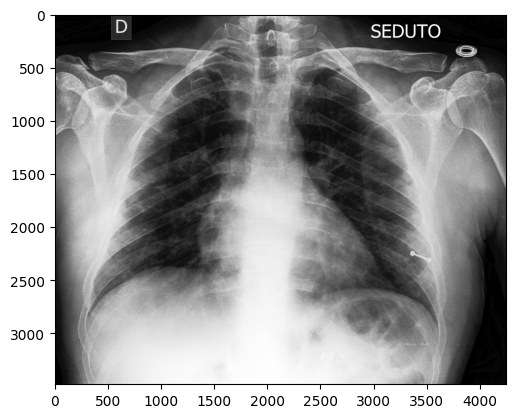

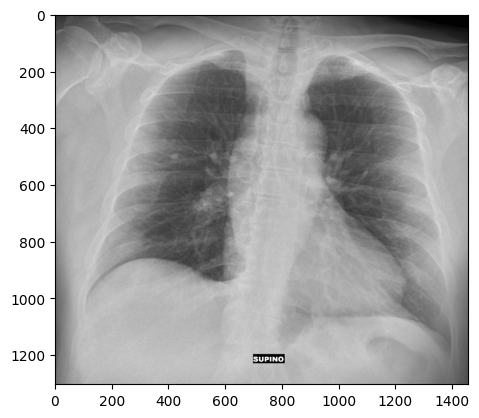

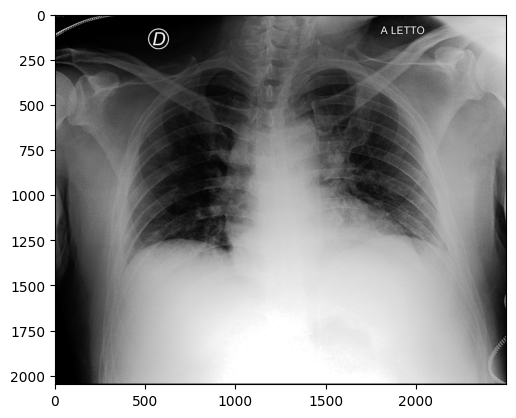

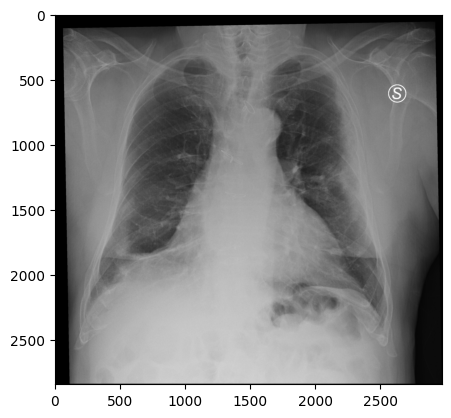

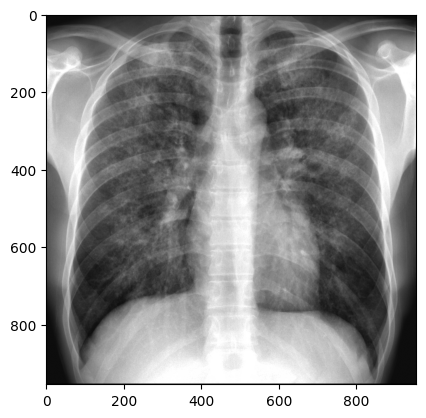

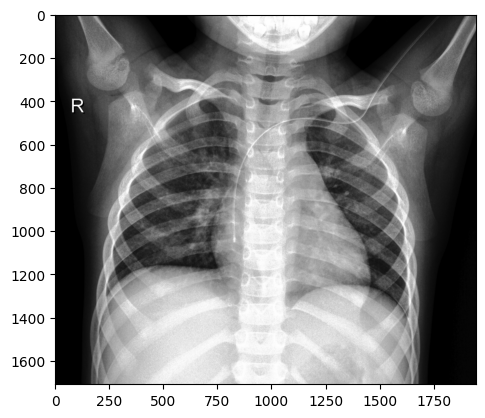

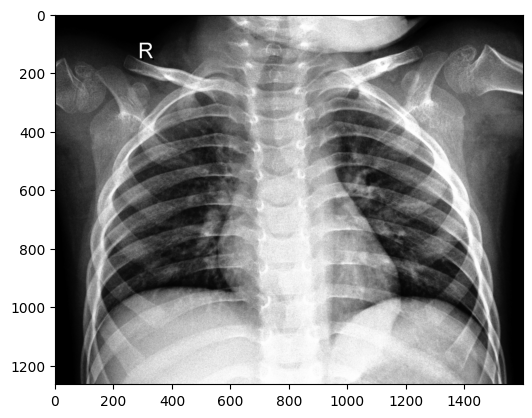

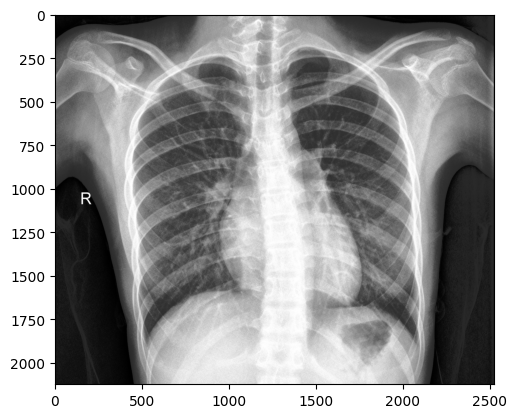

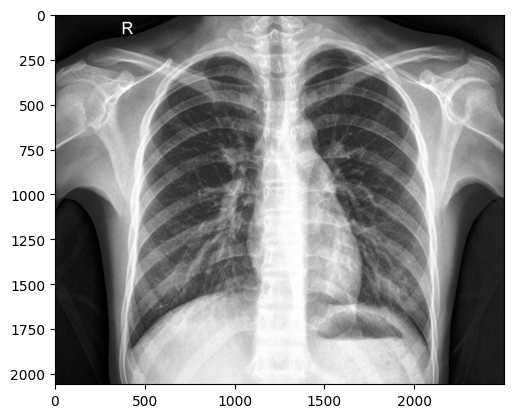

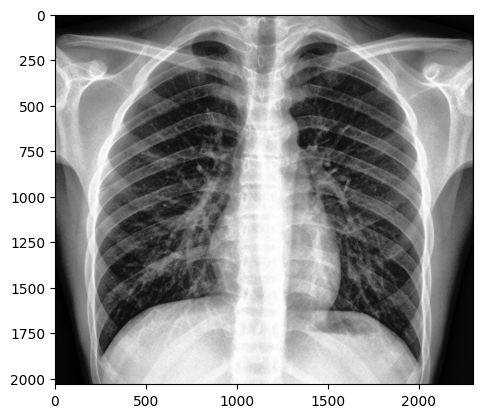

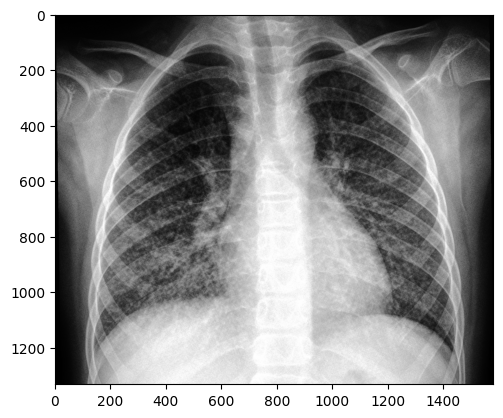

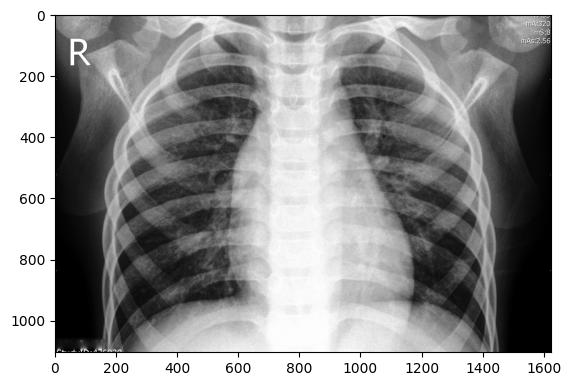

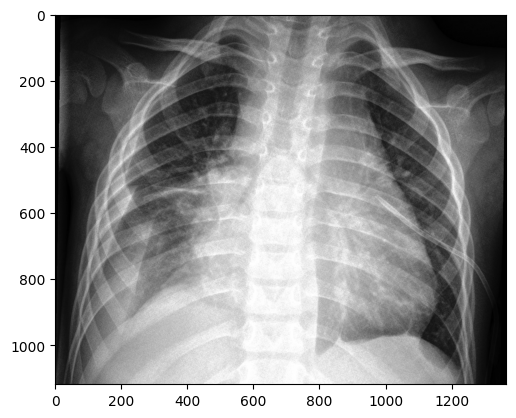

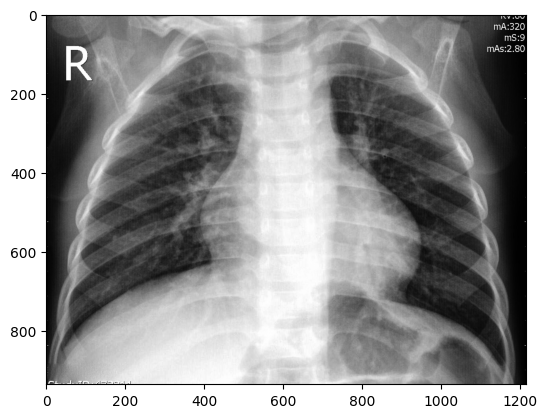

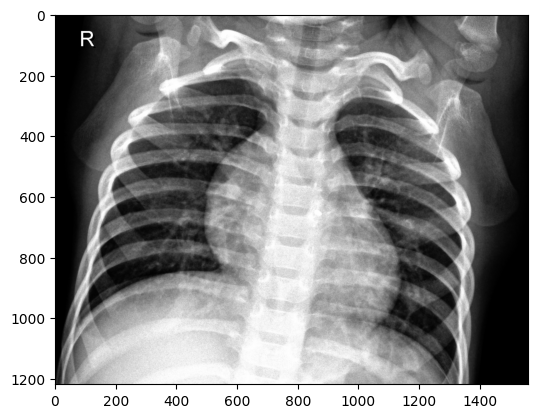

In [2]:
data_dir='Covid19-dataset'
categories=['Covid','Normal','Viral Pneumonia']
for category in categories:
    path= os.path.join(data_dir,category)
    x=0
    for img in os.listdir(path): #
        x+=1
        img_arr=cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_arr,cmap='gray')
        plt.show()
        if x==5:
            break
    

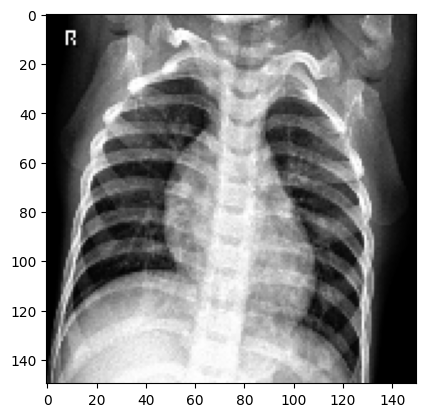

In [3]:
img_size=150
new_arr=cv2.resize(img_arr,(img_size,img_size))
plt.imshow(new_arr, cmap='gray')
plt.show()

In [4]:
training_data=[]
def create_trining_data():
    for category in categories:
        path=os.path.join(data_dir,category)
        class_num=categories.index(category) #0,1,2
        for img in tqdm(os.listdir(path)):
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
                new_arr = cv2.resize(img_array, (img_size, img_size)) 
                training_data.append([new_arr, class_num])  
            except Exception as e:  
                pass


In [5]:
create_trining_data()

100%|██████████| 70/70 [00:01<00:00, 58.60it/s]


In [6]:
print(len(training_data))

251


In [7]:
for sample in training_data[:10]:
    print(sample[1])

0
0
0
0
0
0
0
0
0
0


In [8]:
random.shuffle(training_data) 
for sample in training_data[:10]:
    print(sample[1])

0
1
0
2
2
1
0
0
2
1


In [9]:
print(training_data[:3])

[[array([[161, 168, 167, ..., 175, 165, 163],
       [ 58,  65,  50, ...,  30,  36,  53],
       [ 39,  84,  50, ...,  48,  45,  42],
       ...,
       [115, 116, 117, ..., 140, 128, 124],
       [121, 112, 125, ..., 133, 134, 122],
       [ 89,  97, 111, ..., 139, 135, 120]], dtype=uint8), 0], [array([[ 9, 14, 12, ..., 17, 18, 18],
       [13, 11, 13, ..., 20, 20, 17],
       [13, 11, 15, ..., 15, 19, 19],
       ...,
       [ 1,  3,  4, ..., 13, 12, 15],
       [ 3,  3,  3, ..., 17, 15, 16],
       [ 3,  3,  4, ..., 14, 16, 15]], dtype=uint8), 1], [array([[ 0,  2,  5, ...,  0,  0,  0],
       [ 0,  4,  9, ...,  0,  0,  0],
       [ 0, 17, 32, ...,  1,  0,  0],
       ...,
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  1,  1,  0]], dtype=uint8), 0]]


In [10]:
x=[]
y=[]
for features,lablel in training_data:
    x.append(features)
    y.append(lablel)

In [11]:
x = np.array(x) 
y = np.array(y) 
print(x.shape)
print(y.shape)

(251, 150, 150)
(251,)


In [12]:
pickle_out = open("x.pickle","wb")
pickle.dump(x, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

pickle_in = open("x.pickle","rb")
x = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)

## Visualization

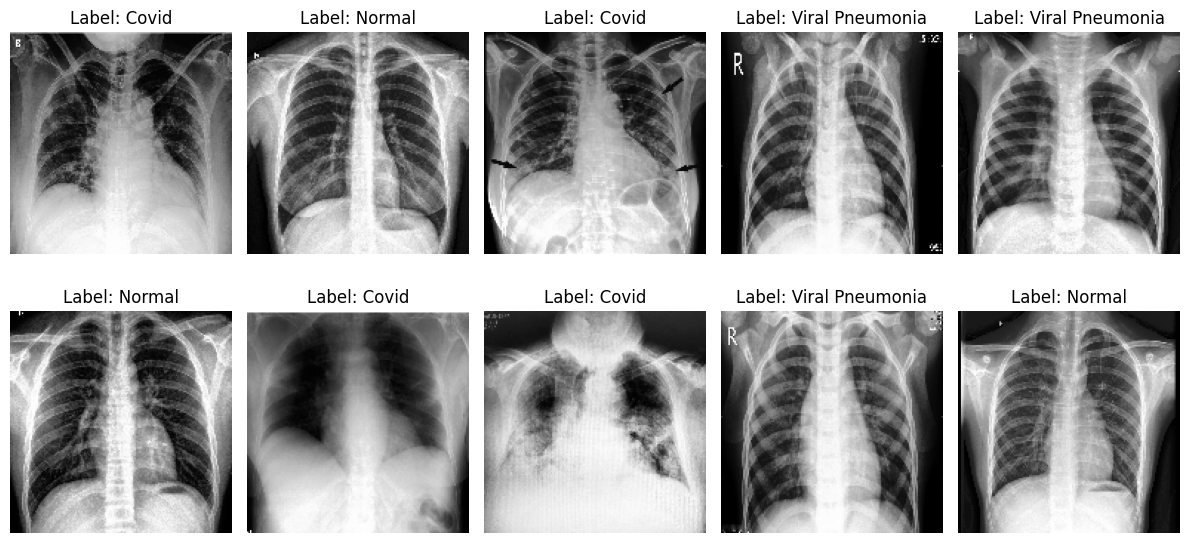

In [13]:
plt.figure(figsize=(12, 6))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(training_data[i][0], cmap='gray')
    plt.title(f"Label: {categories[training_data[i][1]]}")
    plt.axis('off')
plt.tight_layout()

plt.show()

## model building

In [14]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=48)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(200, 150, 150)
(200,)
(51, 150, 150)
(51,)


In [15]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(img_size,img_size)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(64, activation=tf.nn.relu),
    keras.layers.Dense(32, activation=tf.nn.relu),
    keras.layers.Dense(16, activation=tf.nn.relu),
    keras.layers.Dense(3, activation=tf.nn.softmax)
])

c:\Users\ASUS\anaconda3\envs\tf-env\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


## model compilation

In [16]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

## model training

In [17]:
model.fit(x_train, y_train, epochs=60)

Epoch 1/60
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.3943 - loss: 331.4649
Epoch 2/60
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.5279 - loss: 246.8050
Epoch 3/60
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.6300 - loss: 105.9289
Epoch 4/60
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.5822 - loss: 118.7892
Epoch 5/60
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.7392 - loss: 87.1243
Epoch 6/60
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.8040 - loss: 65.7475
Epoch 7/60
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.8179 - loss: 61.2203
Epoch 8/60
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.8944 - loss: 21.3004
Epoch 9/60
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.8853 - loss: 17.7145
Epoch 10/60
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9348 - loss: 15.8113
Epoch 11/60
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.9509 - loss: 8.0863 
Epoch 12/60
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.9330 -

## model evaluation

In [18]:
test_loss, test_acc = model.evaluate(x_test, y_test)
test_acc

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.9400 - loss: 4.8103 


0.9411764740943909

In [19]:
y_pred = model.predict(x_test)

y_pred = np.argmax(y_pred, axis=1)

y_pred

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


array([0, 1, 1, 1, 1, 2, 0, 0, 0, 2, 1, 2, 0, 2, 0, 1, 2, 1, 0, 0, 2, 2,
       0, 2, 2, 1, 2, 2, 1, 0, 0, 0, 1, 2, 2, 2, 1, 0, 1, 0, 0, 2, 2, 0,
       0, 0, 0, 0, 2, 0, 1])

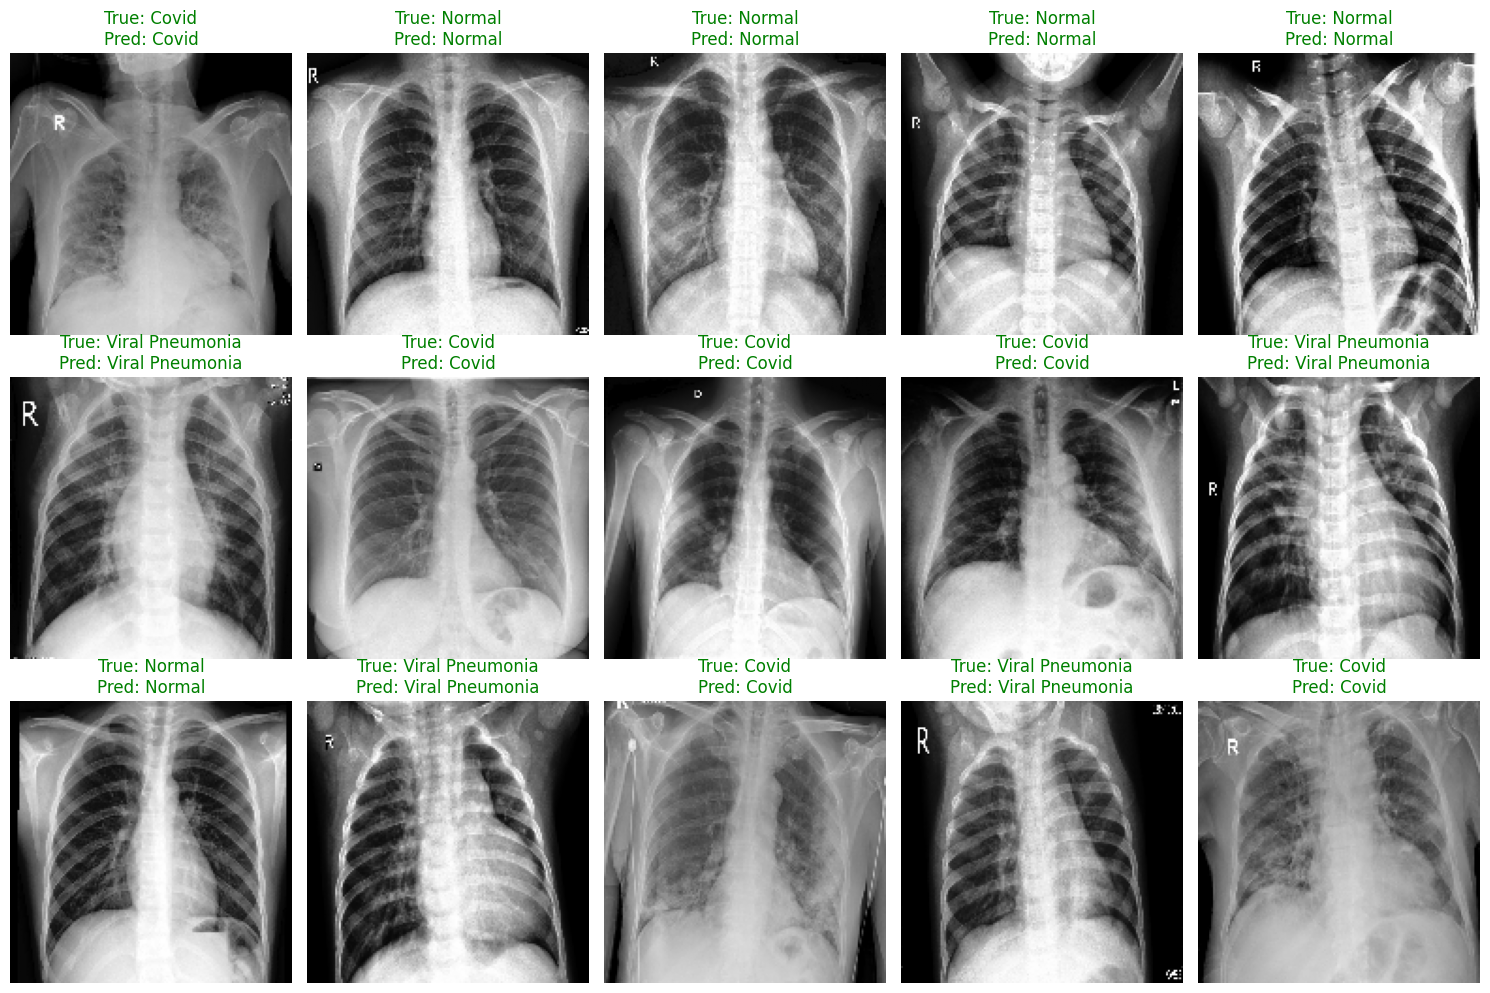

In [20]:
categories = ['Covid', 'Normal', 'Viral Pneumonia']
plt.figure(figsize=(15, 10))
for i in range(15):
    plt.subplot(3, 5, i + 1)
    plt.imshow(x_test[i], cmap='gray')
    plt.axis('off')
    true_label = categories[y_test[i]]
    predicted_label = categories[y_pred[i]]
    color = 'green' if y_test[i] == y_pred[i] else 'red'
    plt.title(f"True: {true_label}\nPred: {predicted_label}", color=color)
plt.tight_layout()
plt.show()


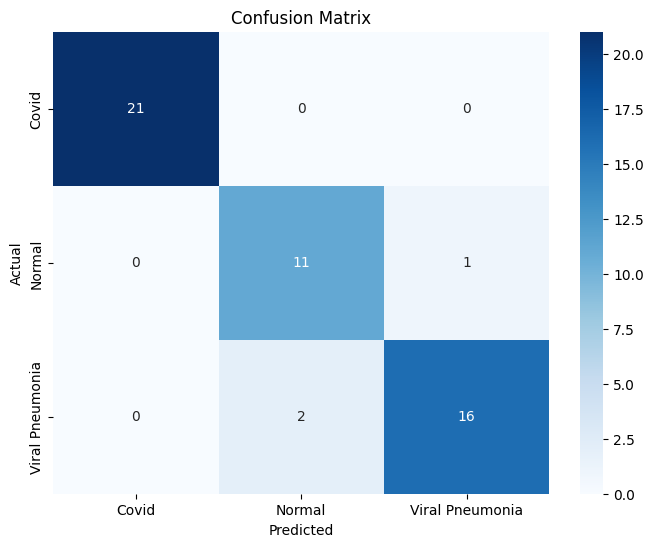

In [21]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=categories, yticklabels=categories, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [22]:
print(classification_report(y_test, y_pred, target_names=categories))

                 precision    recall  f1-score   support

          Covid       1.00      1.00      1.00        21
         Normal       0.85      0.92      0.88        12
Viral Pneumonia       0.94      0.89      0.91        18

       accuracy                           0.94        51
      macro avg       0.93      0.94      0.93        51
   weighted avg       0.94      0.94      0.94        51



In [23]:
print(confusion_matrix(y_test, y_pred))  #[25 1 1] 25 covid 1 normal 1 viral result=> covid

[[21  0  0]
 [ 0 11  1]
 [ 0  2 16]]
